In [42]:
#import library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chart_studio as cs 
import plotly.offline as po
import plotly.graph_objs as gobj

In [43]:
#import Ta-Feng Grocery with containing data from 01/11/2000 until 28/02/2001
Tafeng_data = pd.read_csv("/content/drive/MyDrive/PROYEK/Proyek DAMI/ta_feng_all_months_merged.csv")
Tafeng_data.head() 

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
0,11/1/2000,1104905,45-49,115,110411,4710199010372,2,24,30
1,11/1/2000,418683,45-49,115,120107,4710857472535,1,48,46
2,11/1/2000,1057331,35-39,115,100407,4710043654103,2,142,166
3,11/1/2000,1849332,45-49,Others,120108,4710126092129,1,32,38
4,11/1/2000,1981995,50-54,115,100205,4710176021445,1,14,18


#Exploratory Data Analysis

In [44]:
#Display 10 sample data
Tafeng_data.sample(10)

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
54929,11/9/2000,1633320,40-44,221,100208,4710144202463,1,79,85
419293,1/13/2001,670753,45-49,110,560204,4710032501791,2,136,124
725304,2/17/2001,915793,55-59,221,130204,4710063312168,1,112,123
421012,1/13/2001,2108865,35-39,221,100324,4713754987607,1,45,59
725893,2/18/2001,269247,40-44,221,100217,4934567911768,1,44,58
510762,1/20/2001,42666,35-39,115,500705,4718647503377,2,360,478
341313,12/16/2000,2027784,45-49,115,100302,4710852888874,1,54,65
441501,1/13/2001,419826,50-54,110,500102,4712054701371,1,54,79
646109,2/10/2001,1864250,25-29,115,470611,4710333721737,5,140,180
790189,2/26/2001,1846706,NaN,Unknown,110117,4710046352204,1,23,31


In [45]:
#Display descriptive statistics
Tafeng_data.describe()

,CUSTOMER_ID,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
count,8.177410e+05,817741.000000,8.177410e+05,817741.000000,817741.000000,817741.000000
mean,1.406620e+06,284950.495933,4.461639e+12,1.381781,112.109848,131.875589
std,7.489784e+05,226390.701451,1.690093e+12,2.897473,603.661776,631.057633
min,1.069000e+03,100101.000000,2.000882e+07,1.000000,0.000000,1.000000
25%,9.692220e+05,110106.000000,4.710085e+12,1.000000,35.000000,42.000000
50%,1.587722e+06,130106.000000,4.710421e+12,1.000000,62.000000,76.000000
75%,1.854930e+06,520314.000000,4.712500e+12,1.000000,112.000000,132.000000
max,2.000200e+07,780510.000000,9.789580e+12,1200.000000,432000.000000,444000.000000


In [46]:
#Check for missing values in the dataset
Tafeng_data.isnull().sum(axis=0)

TRANSACTION_DT          0
CUSTOMER_ID             0
AGE_GROUP           22362
PIN_CODE                0
PRODUCT_SUBCLASS        0
PRODUCT_ID              0
AMOUNT                  0
ASSET                   0
SALES_PRICE             0
dtype: int64

In [47]:
#Check the shape (number of columns and rows) in the dataset
Tafeng_data.shape

(817741, 9)

In [48]:
#Customer distribution by age group
age_group_cust_data=Tafeng_data[['AGE_GROUP', 'CUSTOMER_ID']].drop_duplicates()
age_group_cust_data.groupby(['AGE_GROUP'])['CUSTOMER_ID'].aggregate('count').reset_index().sort_values('CUSTOMER_ID', ascending= False)


,AGE_GROUP,CUSTOMER_ID
2,35-39,6588
1,30-34,5916
3,40-44,5084
4,45-49,3723
0,25-29,3196
5,50-54,2184
8,<25,1630
9,>65,1363
6,55-59,1076
7,60-64,880


In [49]:
Tafeng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817741 entries, 0 to 817740
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   TRANSACTION_DT    817741 non-null  object
 1   CUSTOMER_ID       817741 non-null  int64 
 2   AGE_GROUP         795379 non-null  object
 3   PIN_CODE          817741 non-null  object
 4   PRODUCT_SUBCLASS  817741 non-null  int64 
 5   PRODUCT_ID        817741 non-null  int64 
 6   AMOUNT            817741 non-null  int64 
 7   ASSET             817741 non-null  int64 
 8   SALES_PRICE       817741 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 56.1+ MB


In [50]:
numerical_vars = ['TRANSACTION_DT','CUSTOMER_ID', 'AGE_GROUP', 'PIN_CODE', 'PRODUCT_SUBCLASS', 'PRODUCT_ID', 'AMOUNT', 'ASSET', 'SALES_PRICE']


In [51]:
Tafeng_data['SALES_PRICE'].describe()

count    817741.000000
mean        131.875589
std         631.057633
min           1.000000
25%          42.000000
50%          76.000000
75%         132.000000
max      444000.000000
Name: SALES_PRICE, dtype: float64

In [52]:
Tafeng_data['TRANSACTION_DT'].describe()

count        817741
unique          120
top       1/21/2001
freq          21129
Name: TRANSACTION_DT, dtype: object

In [53]:
Tafeng_data['CUSTOMER_ID'].describe()

count    8.177410e+05
mean     1.406620e+06
std      7.489784e+05
min      1.069000e+03
25%      9.692220e+05
50%      1.587722e+06
75%      1.854930e+06
max      2.000200e+07
Name: CUSTOMER_ID, dtype: float64

In [54]:
#Customer distribution by transaction date
transaction_cust_data=Tafeng_data[['TRANSACTION_DT', 'CUSTOMER_ID']].drop_duplicates()
transaction_cust_data.groupby(['TRANSACTION_DT'])['CUSTOMER_ID'].aggregate('count').reset_index().sort_values('CUSTOMER_ID', ascending= False)


,TRANSACTION_DT,CUSTOMER_ID
14,1/22/2001,2232
13,1/21/2001,2079
49,11/26/2000,1785
48,11/25/2000,1709
34,11/12/2000,1653
...,...,...
76,12/23/2000,132
73,12/20/2000,118
74,12/21/2000,105
75,12/22/2000,81


#Data Preprocessing

In [55]:
#Remove missing values from CUSTOMER_ID column
#We can ignore missing values in description column
Tafeng_data = Tafeng_data[pd.notnull(Tafeng_data['CUSTOMER_ID'])]

In [56]:
#Check validation, if there are any negative values in AMOUNT column
Tafeng_data.AMOUNT.min()

1

In [57]:
#Check validation, if there are any negative values in SALES_PRICE column
Tafeng_data.SALES_PRICE.min()

1

In [58]:
#Filter out data with negative values
Tafeng_data = Tafeng_data[(Tafeng_data["AMOUNT"] > 0)]

In [59]:
#Convert the string date field to datetime
Tafeng_data['TRANSACTION_DT'] = pd.to_datetime(Tafeng_data['TRANSACTION_DT'])

In [60]:
Tafeng_data.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
0,2000-11-01,1104905,45-49,115,110411,4710199010372,2,24,30
1,2000-11-01,418683,45-49,115,120107,4710857472535,1,48,46
2,2000-11-01,1057331,35-39,115,100407,4710043654103,2,142,166
3,2000-11-01,1849332,45-49,Others,120108,4710126092129,1,32,38
4,2000-11-01,1981995,50-54,115,100205,4710176021445,1,14,18


In [61]:
print("Summary...")
#exploring the unique values of each attribute
print("Number of transactions:", Tafeng_data['SALES_PRICE'].nunique())
print("Number of products bought:", Tafeng_data['PRODUCT_ID'].nunique())
print("Number of customers:", Tafeng_data['CUSTOMER_ID'].nunique())
print("Percentage of customers NA:", round(Tafeng_data['CUSTOMER_ID'].isnull().sum()*100/len(Tafeng_data),2),"%")


Summary...
Number of transactions: 2191
Number of products bought: 23812
Number of customers: 32266
Percentage of customers NA: 0.0 %


#RFM MODELLING

In [62]:
#Recency = Latest Date - Last Transaction Date,
#Frequency = count of transaction(s) no. for each customer,
#Monetary = Sum of Sales Price for each customer
import datetime as dt

#Set latest date 2001-03-01 as last invoice date was 2001-02-28. Its goal is to calculate the number of days.
Latest_Date = dt.datetime(2001,3,1)

#Create RFM Modelling scores for each customer --> Recency
RScores = Tafeng_data.groupby('CUSTOMER_ID').agg({'TRANSACTION_DT': lambda x: (Latest_Date - x.max()).days})

#Create TRANSACTION_DT into type int
RScores['TRANSACTION_DT'] = RScores['TRANSACTION_DT'].astype(int)

#Rename column names to Recency
RScores.rename(columns={'TRANSACTION_DT': 'Recency'}, inplace=True)
RScores.reset_index().head()

,CUSTOMER_ID,Recency
0,1069,19
1,1113,54
2,1250,19
3,1359,87
4,1823,36


In [63]:
#Create RFM Modelling scores for each customer --> Frequency
FScores=Tafeng_data.groupby(['CUSTOMER_ID']).size().to_frame('size').sort_values(['CUSTOMER_ID','size'], ascending=[True,False])

#Rename column names to Frequency
FScores.rename(columns={'size': 'Frequency'}, inplace=True)
FScores.reset_index().head()

,CUSTOMER_ID,Frequency
0,1069,11
1,1113,18
2,1250,14
3,1359,3
4,1823,14


In [64]:
#Create RFM Modelling scores for each customer --> Monetary
MScores=Tafeng_data.groupby(['CUSTOMER_ID']).agg({'SALES_PRICE':lambda x:x.sum()})

#Rename column names to Monetary
MScores.rename(columns={'SALES_PRICE': 'Monetary'}, inplace=True)
MScores.reset_index().head()

,CUSTOMER_ID,Monetary
0,1069,1944
1,1113,2230
2,1250,1583
3,1359,364
4,1823,2607


#Create RFM Table

In [65]:
#merge recency dataframe with frequency dataframe
temp_df=RScores.merge(FScores, on = 'CUSTOMER_ID')
temp_df.head()

,Recency,Frequency
CUSTOMER_ID,,
1069,19,11
1113,54,18
1250,19,14
1359,87,3
1823,36,14


In [66]:
#merge with monetary dataframe to get a table with 3 columns
RFMScoring = temp_df.merge(MScores, on='CUSTOMER_ID')
#check the head
RFMScoring.head()

,Recency,Frequency,Monetary
CUSTOMER_ID,,,
1069,19,11,1944
1113,54,18,2230
1250,19,14,1583
1359,87,3,364
1823,36,14,2607


In [67]:
#Descriptive Statistics (Recency)
RFMScoring.Recency.describe()

count    32266.000000
mean        37.435474
std         33.658454
min          1.000000
25%          9.000000
50%         26.000000
75%         59.000000
max        120.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



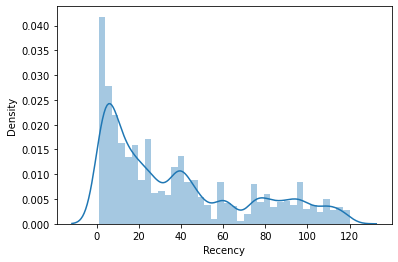

In [68]:
#Recency distribution plot
import seaborn as sns
x = RFMScoring['Recency']
ax = sns.distplot(x)

In [69]:
#Descriptive Statstics (Frequency)
RFMScoring.Frequency.describe()

count    32266.000000
mean        25.343736
std         34.717992
min          1.000000
25%          6.000000
50%         14.000000
75%         32.000000
max       1246.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



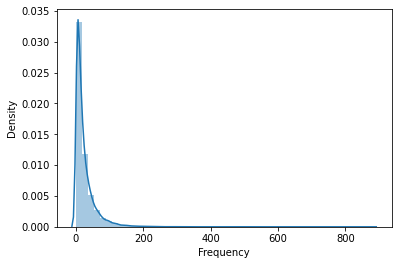

In [70]:
#Frequency distribution plot, focus on frequency less than 1000
import seaborn as sns
x = RFMScoring.query('Frequency < 1000')['Frequency']
ax = sns.distplot(x)

In [71]:
#Descriptive Statstics (Monetary)
RFMScoring.Monetary.describe()

count     32266.000000
mean       3342.220170
std        6215.318795
min           8.000000
25%         710.000000
50%        1765.500000
75%        4039.000000
max      459771.000000
Name: Monetary, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



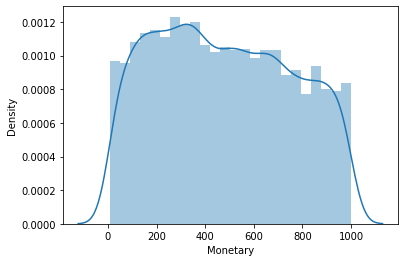

In [72]:
#Monetary distribution plot, focus on monetary less than 1000
import seaborn as sns
x = RFMScoring.query('Monetary < 1000')['Monetary']
ax = sns.distplot(x)

In [73]:
#Split Recency, Frequency, and Monetary into four segments using quantiles
quantiles = RFMScoring.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles 

{'Frequency': {0.25: 6.0, 0.5: 14.0, 0.75: 32.0},
 'Monetary': {0.25: 710.0, 0.5: 1765.5, 0.75: 4039.0},
 'Recency': {0.25: 9.0, 0.5: 26.0, 0.75: 59.0}}

In [74]:
#Functions to create R, F, and M segments
def RScoring(x,p,d):
  if x<= d[p][0.25]:
      return 1
  elif x <= d[p][0.50]:
      return 2
  elif x <= d[p][0.75]:
       return 3
  else:
        return 4
def FnMScoring(x,p,d):
  if x<= d[p][0.25]:
      return 4
  elif x <= d[p][0.50]:
      return 3
  elif x <= d[p][0.75]:
      return 2
  else:
       return 1

In [75]:
#Calculate Add R, F, and M segment value columns to the existing dataset to show R segment values
RFMScoring['R'] = RFMScoring['Recency'].apply(RScoring, args=('Recency', quantiles,))
RFMScoring['F'] = RFMScoring['Frequency'].apply(FnMScoring, args=('Frequency', quantiles,))
RFMScoring['M'] = RFMScoring['Monetary'].apply(FnMScoring, args=('Monetary', quantiles,))
RFMScoring.head()

,Recency,Frequency,Monetary,R,F,M
CUSTOMER_ID,,,,,,
1069,19,11,1944,2,3,2
1113,54,18,2230,3,2,2
1250,19,14,1583,2,3,3
1359,87,3,364,4,4,4
1823,36,14,2607,3,3,2


In [76]:
#Calculate and Add RFMCluster value column showing combined concatenated score of RFM
RFMScoring['RFMCluster'] =  RFMScoring.R.map(str) + RFMScoring.F.map(str) + RFMScoring.M.map(str)

#Calculate and Add RFMScoring value column showing total sum of RFMCluster values
RFMScoring['RFMScore'] = RFMScoring[['R','F','M']].sum(axis=1)
RFMScoring.head()

,Recency,Frequency,Monetary,R,F,M,RFMCluster,RFMScore
CUSTOMER_ID,,,,,,,,
1069,19,11,1944,2,3,2,232,7
1113,54,18,2230,3,2,2,322,7
1250,19,14,1583,2,3,3,233,8
1359,87,3,364,4,4,4,444,12
1823,36,14,2607,3,3,2,332,8


In [77]:
#Assign loyalty level to each customer -- class label
loyalty_level = ['Superstars', 'Golden', 'Occasional', 'Everyday', 'Dormant']
score_cuts = pd.qcut(RFMScoring.RFMScore, q = 5, labels = loyalty_level)
RFMScoring['RFMLoyalty_Level'] = score_cuts.values
RFMScoring.reset_index().head()

,CUSTOMER_ID,Recency,Frequency,Monetary,R,F,M,RFMCluster,RFMScore,RFMLoyalty_Level
0,1069,19,11,1944,2,3,2,232,7,Golden
1,1113,54,18,2230,3,2,2,322,7,Golden
2,1250,19,14,1583,2,3,3,233,8,Occasional
3,1359,87,3,364,4,4,4,444,12,Dormant
4,1823,36,14,2607,3,3,2,332,8,Occasional


In [78]:
#Validate the data for RFMCluster = 322
RFMScoring[RFMScoring['RFMCluster']=='322'].sort_values('Monetary', ascending = False).reset_index().head(10)

,CUSTOMER_ID,Recency,Frequency,Monetary,R,F,M,RFMCluster,RFMScore,RFMLoyalty_Level
0,2161754,38,29,4037,3,2,2,322,7,Golden
1,1300642,52,26,4035,3,2,2,322,7,Golden
2,1477900,27,16,4034,3,2,2,322,7,Golden
3,2072265,30,25,4034,3,2,2,322,7,Golden
4,2051994,31,20,4030,3,2,2,322,7,Golden
5,1165449,33,26,4028,3,2,2,322,7,Golden
6,1037784,32,28,4027,3,2,2,322,7,Golden
7,521338,40,16,4026,3,2,2,322,7,Golden
8,946223,40,26,4015,3,2,2,322,7,Golden
9,2073095,39,31,4000,3,2,2,322,7,Golden


In [79]:
#Validate the data for RFMCluster = 233
RFMScoring[RFMScoring['RFMCluster']=='233'].sort_values('Monetary', ascending = False).reset_index().head(10)

,CUSTOMER_ID,Recency,Frequency,Monetary,R,F,M,RFMCluster,RFMScore,RFMLoyalty_Level
0,1822076,19,10,1763,2,3,3,233,8,Occasional
1,1909555,18,11,1762,2,3,3,233,8,Occasional
2,1704358,25,10,1762,2,3,3,233,8,Occasional
3,1641608,25,8,1752,2,3,3,233,8,Occasional
4,895392,18,8,1751,2,3,3,233,8,Occasional
5,1569131,18,9,1751,2,3,3,233,8,Occasional
6,916707,21,14,1750,2,3,3,233,8,Occasional
7,1737547,13,7,1749,2,3,3,233,8,Occasional
8,1690736,24,11,1743,2,3,3,233,8,Occasional
9,2164755,16,12,1742,2,3,3,233,8,Occasional


#Preparating Data for Clustering using K-Means

In [80]:
#Recency vs Frequency
graph = RFMScoring.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
             gobj.Scatter(
                 x=graph.query("RFMLoyalty_Level == 'Dormant'")['Recency'],
                 y=graph.query("RFMLoyalty_Level == 'Dormant'")['Frequency'],
                 mode = 'markers',
                 name = 'Dormant',
                 marker= dict(size = 5,
                              line = dict(width=1),
                              color ='blue',
                              opacity=0.8
                              )
             ),
           gobj.Scatter(
                 x=graph.query("RFMLoyalty_Level == 'Everyday'")['Recency'],
                 y=graph.query("RFMLoyalty_Level == 'Everyday'")['Frequency'],
                 mode = 'markers',
                 name = 'Everyday',
                 marker= dict(size = 7,
                              line = dict(width=1),
                              color ='green',
                              opacity=0.8
                              )  
                 ),
           gobj.Scatter(
                 x=graph.query("RFMLoyalty_Level == 'Occasional'")['Recency'],
                 y=graph.query("RFMLoyalty_Level == 'Occasional'")['Frequency'],
                 mode = 'markers',
                 name = 'Occasional',
                 marker= dict(size = 9,
                              line = dict(width=1),
                              color ='black',
                              opacity=0.8
                              ) 
           ),
            gobj.Scatter(
                 x=graph.query("RFMLoyalty_Level == 'Golden'")['Recency'],
                 y=graph.query("RFMLoyalty_Level == 'Golden'")['Frequency'],
                 mode = 'markers',
                 name = 'Golden',
                 marker= dict(size = 11,
                              line = dict(width=1),
                              color ='yellow',
                              opacity=0.8
                              ) 
            ),
             gobj.Scatter(
                 x=graph.query("RFMLoyalty_Level == 'Superstars'")['Recency'],
                 y=graph.query("RFMLoyalty_Level == 'Superstars'")['Frequency'],
                 mode = 'markers',
                 name = 'Superstars',
                 marker= dict(size = 13,
                              line = dict(width=1),
                              color ='red',
                              opacity=0.8
                              ) 
             ),
             
]
plot_layout = gobj.Layout(
    yaxis={'title': 'Frequency'},
    xaxis={'title': 'Recency'},
    title = 'Recency vs Frequency'
)
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [81]:
#Frequency vs Monetary
graph = RFMScoring.query("Monetary < 50000 and Frequency < 2000")

plot_data=[
    gobj.Scatter(
        x=graph.query("RFMLoyalty_Level == 'Dormant'")['Monetary'],
        y=graph.query("RFMLoyalty_Level == 'Dormant'")['Frequency'],
        mode = 'markers',
        name = 'Dormant',
        marker = dict(size=5,
                      line=dict(width=1),
                      color ='blue',
                      opacity =0.8
                      )
    ),
    gobj.Scatter(
        x=graph.query("RFMLoyalty_Level == 'Everyday'")['Monetary'],
        y=graph.query("RFMLoyalty_Level == 'Everyday'")['Frequency'],
        mode='markers',
        name='Everyday',
        marker=dict(size=7,
                    line = dict(width =1),
                    color= 'green',
                    opacity = 0.8
                    )
    ),
     gobj.Scatter(
        x=graph.query("RFMLoyalty_Level == 'Occasional'")['Monetary'],
        y=graph.query("RFMLoyalty_Level == 'Occasional'")['Frequency'],
        mode='markers',
        name='Occasional',
        marker=dict(size=9,
                    line = dict(width =1),
                    color ='black',
                    opacity = 0.8
                    )
     ),
      gobj.Scatter(
        x=graph.query("RFMLoyalty_Level == 'Golden'")['Monetary'],
        y=graph.query("RFMLoyalty_Level == 'Golden'")['Frequency'],
        mode='markers',
        name='Golden',
        marker=dict(size=11,
                    line = dict(width =1),
                    color ='yellow',
                    opacity = 0.8
                    )
      ),
       gobj.Scatter(
        x=graph.query("RFMLoyalty_Level == 'Superstars'")['Monetary'],
        y=graph.query("RFMLoyalty_Level == 'Superstars'")['Frequency'],
        mode='markers',
        name='Superstars',
        marker=dict(size=13,
                    line = dict(width =1),
                    color ='red',
                    opacity = 0.8                    )
       ),
]
plot_layout = gobj.Layout(
    yaxis={'title': "Monetary"},
    xaxis={'title': "Frequency"},
    title = 'Frequency vs Monetery'
)
fig = gobj.Figure(data=plot_data, layout =plot_layout)
po.iplot(fig)

In [82]:
#Recency vs Monetary
graph = RFMScoring.query("Monetary < 50000 and Frequency < 2000")

plot_data=[
    gobj.Scatter(
        x=graph.query("RFMLoyalty_Level == 'Dormant'")['Recency'],
        y=graph.query("RFMLoyalty_Level == 'Dormant'")['Monetary'],
        mode = 'markers',
        name = 'Dormant',
        marker = dict(size=5,
                      line=dict(width=1),
                      color ='blue',
                      opacity =0.8
                      )
    ),
    gobj.Scatter(
        x=graph.query("RFMLoyalty_Level == 'Everyday'")['Recency'],
        y=graph.query("RFMLoyalty_Level == 'Everyday'")['Monetary'],
        mode='markers',
        name='Everyday',
        marker=dict(size=7,
                    line = dict(width =1),
                    color= 'green',
                    opacity = 0.8
                    )
    ),
     gobj.Scatter(
        x=graph.query("RFMLoyalty_Level == 'Occasional'")['Recency'],
        y=graph.query("RFMLoyalty_Level == 'Occasional'")['Monetary'],
        mode='markers',
        name='Occasional',
        marker=dict(size=9,
                    line = dict(width =1),
                    color ='black',
                    opacity = 0.8
                    )
     ),
      gobj.Scatter(
        x=graph.query("RFMLoyalty_Level == 'Golden'")['Recency'],
        y=graph.query("RFMLoyalty_Level == 'Golden'")['Monetary'],
        mode='markers',
        name='Golden',
        marker=dict(size=11,
                    line = dict(width =1),
                    color ='yellow',
                    opacity = 0.8
                    )
      ),
       gobj.Scatter(
        x=graph.query("RFMLoyalty_Level == 'Superstars'")['Recency'],
        y=graph.query("RFMLoyalty_Level == 'Superstars'")['Monetary'],
        mode='markers',
        name='Superstars',
        marker=dict(size=13,
                    line = dict(width =1),
                    color ='red',
                    opacity = 0.8                    )
       ),
]
plot_layout = gobj.Layout(
    yaxis={'title': "Recency"},
    xaxis={'title': "Monetary"},
    title = 'Recency vs Monetery'
)
fig = gobj.Figure(data=plot_data, layout =plot_layout)
po.iplot(fig)